<a href="https://colab.research.google.com/github/dikisp/starter-template-bot/blob/master/split_data_tanah_airku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import csv
from collections import defaultdict
import re
import json



from scipy.stats import pearsonr

from matplotlib.colors import ListedColormap
from scipy import stats

from wordcloud import WordCloud


from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler


# Mining and Stuff
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import KMeans


#linear regression
from sklearn.linear_model import LinearRegression

#seaborn
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('data-mentah.xlsx')

In [4]:
new_names = {0 : 'tgl_akses',
             1 : 'id_user',
             2 : 'durasiAkses',
             3 : 'konten'
            }
df.rename(columns=new_names, inplace=True)

In [5]:
del df['Unnamed: 0']

In [6]:
#ini 
konten_to_array = np.array(df.konten)
konten_to_list = konten_to_array.tolist()
c =" ".join(str(x) for x in konten_to_list)

In [7]:
test_str = c

# initializing word list  
word_list = 'START'
  
# initializing replace word  
repl_wrd = 'START'
  
# Replace multiple words with K 
# Using join() + split() + list comprehension 
res = ' '.join([repl_wrd if idx in word_list else idx for idx in test_str.split(',')]) 

# printing result  
# print("String after multiple replace : " + str(res))  
ganti_space = res.replace(' ',',')
ganti_koma = ganti_space.replace(',,',',')
split_data = ganti_koma.split(',')
split_data

sq = []


#perulangan untuk hapus string start
for x in split_data:
  if(x != "START"):
    sq.append(x)

konten_tanpa_start = pd.DataFrame(sq)

In [8]:
df_konten = pd.DataFrame(split_data)

In [9]:
durasi_to_array = np.array(df.durasiAkses)
durasi_to_list = durasi_to_array.tolist()
g =" ".join(str(x) for x in durasi_to_list)


test_str = g

# initializing word list  
word_list = '0'
  
# initializing replace word  
repl_wrd = '0'
  
# Replace multiple words with K 
# Using join() + split() + list comprehension 
res = ' '.join([repl_wrd if idx in word_list else idx for idx in test_str.split(',')]) 

# printing result  
# print("String after multiple replace : " + str(res))  
tambah_koma = res.replace(' ',',')
ganti_koma = tambah_koma.replace(',,',',')
split_data_durasi = ganti_koma.split(',')

df_durasi = pd.DataFrame(split_data_durasi)
# sq = []

# for x in q:
#   if(x != "START"):
#     sq.append(x)

# konten_tanpa_start = pd.DataFrame(sq)


In [10]:
res_ = pd.concat([df.tgl_akses,df.id_user,df_konten,df_durasi ],axis=1)

new_df = []
for i, row in df.iterrows():
  tgl_akses = df['tgl_akses'][i]
  id_user = df['id_user'][i]
  durasi_akses = df['durasiAkses'][i]
  konten = df['konten'][i]

  konten_to_array = konten.split(", ")
  
  durasi_to_array = durasi_akses.split(', ')
  # print(durasi_to_array)
  for j in range(len(konten_to_array)):
    new_df.append((tgl_akses, id_user, durasi_to_array[j], konten_to_array[j]))
  
new_df = pd.DataFrame(new_df)
# new_df

In [11]:
new_names = {0 : 'tgl_akses',
             1 : 'id_user',
             2 : 'durasiAkses',
             3 : 'konten'
            }
new_df.rename(columns=new_names, inplace=True)

In [12]:
#conversi ke int untuk atribut durasiAkses
new_df.durasiAkses = new_df.durasiAkses.astype(int)

In [13]:
#hapus dibawah 5
new_df.drop(new_df[new_df['durasiAkses'] <=5 ].index, inplace=True)

In [14]:
konten1 = new_df.konten == 'Pakaian_Asmat'
kora = new_df[konten1].durasiAkses

konten2 = new_df.konten == 'Pakaian_Sunda'
korb = new_df[konten2].durasiAkses

In [15]:
ac = pd.DataFrame(np.array(kora))
bc = pd.DataFrame(np.array(korb))
hasil = pd.concat([ac,bc], axis =1)
hasil.columns = ['var1','var2']
finish = hasil.replace(np.nan, -1)

In [16]:
# #test regression
# model = LinearRegression()
# model.fit(finish.var1,finish.var2)
# result = model.predict([12][0]) 
# result

In [17]:
#aceh
rumah_aceh   = new_df['konten'] == 'Rumah_Aceh'
pakaian_aceh = new_df['konten'] == 'Pakaian_Aceh'
senjata_aceh = new_df['konten'] == 'Senjata_Aceh'
musik_aceh   = new_df['konten'] == 'Musik_Aceh'
makanan_aceh = new_df['konten'] == 'Makanan_Aceh'


r_aceh = new_df[rumah_aceh].durasiAkses
p_aceh = new_df[pakaian_aceh].durasiAkses
s_aceh = new_df[senjata_aceh].durasiAkses
m_aceh = new_df[musik_aceh].durasiAkses
mk_aceh= new_df[makanan_aceh].durasiAkses

#to array
arr_r_aceh = pd.DataFrame(np.array(r_aceh))
arr_p_aceh = pd.DataFrame(np.array(p_aceh))
arr_s_aceh = pd.DataFrame(np.array(s_aceh))
arr_m_aceh = pd.DataFrame(np.array(m_aceh))
arr_mk_aceh = pd.DataFrame(np.array(mk_aceh))

#concat dua variable
res_aceh = pd.concat([arr_r_aceh,arr_p_aceh, arr_s_aceh, arr_m_aceh,arr_mk_aceh],axis=1)

#columns name
res_aceh.columns = ['rm_aceh','pk_aceh','sj_aceh','ms_aceh','mkn_aceh']

#replace nan value
res_aceh = res_aceh.replace(np.nan, -1)
kol_res_aceh = res_aceh.replace(np.nan, -1)
# res_aceh.rm_aceh.corr(res_aceh.ms_aceh, method='pearson')

In [18]:
#asmat
rumah_asmat   = new_df['konten'] == 'Rumah_Asmat'
senjata_asmat = new_df['konten'] == 'Senjata_Asmat'
musik_asmat   = new_df['konten'] == 'Musik_Asmat'
makanan_asmat = new_df['konten'] == 'Makanan_Asmat'
pakaian_asmat = new_df['konten'] == 'Pakaian_Asmat'

r_asmat = new_df[rumah_asmat].durasiAkses
s_asmat = new_df[senjata_asmat].durasiAkses
m_asmat = new_df[musik_asmat].durasiAkses
mk_asmat = new_df[makanan_asmat].durasiAkses
p_asmat = new_df[pakaian_asmat].durasiAkses


#to array
arr_r_asmat = pd.DataFrame(np.array(r_asmat))
arr_s_asmat = pd.DataFrame(np.array(s_asmat))
arr_m_asmat = pd.DataFrame(np.array(m_asmat))
arr_mk_asmat = pd.DataFrame(np.array(mk_asmat))
arr_p_asmat = pd.DataFrame(np.array(p_asmat))


#concate
res_asmat = pd.concat([arr_r_asmat,arr_s_asmat, arr_m_asmat, arr_mk_asmat, arr_p_asmat], axis=1)

#coulmns name
res_asmat.columns = ['rm_asmat','pk_asmat','sj_asmat','ms_asmat','mkn_asmat']

#np nana
res_asmat = res_asmat.replace(np.nan, -1)
kol_res_asmat = res_asmat.replace(np.nan, -1)

In [19]:
#bali
rumah_bali   = new_df['konten'] == 'Rumah_Bali'
senjata_bali = new_df['konten'] == 'Senjata_Bali'
musik_bali   = new_df['konten'] == 'Musik_Bali'
makanan_bali = new_df['konten'] == 'Makanan_Bali'
pakaian_bali = new_df['konten'] == 'Pakaian_Bali'

r_bali = new_df[rumah_bali].durasiAkses
s_bali = new_df[senjata_bali].durasiAkses
m_bali= new_df[musik_bali].durasiAkses
mk_bali = new_df[makanan_bali].durasiAkses
p_bali = new_df[pakaian_bali].durasiAkses

#to array
arr_r_bali = pd.DataFrame(np.array(r_bali))
arr_s_bali = pd.DataFrame(np.array(s_bali))
arr_m_bali = pd.DataFrame(np.array(m_bali))
arr_mk_bali = pd.DataFrame(np.array(mk_bali))
arr_p_bali = pd.DataFrame(np.array(p_bali))


#concate
res_bali = pd.concat([arr_r_bali, arr_s_bali, arr_m_bali, arr_mk_bali, arr_p_bali], axis=1)


#columns name
res_bali.columns = ['rm_bali','sj_bali','ms_bali','mkn_bali','pk_bali']

#np nan bali
res_bali = res_bali.replace(np.nan, -1)
kol_res_bali = res_bali.replace(np.nan, -1)

In [20]:
#dayak 
rumah_dayak   = new_df['konten'] == 'Rumah_Dayak'
senjata_dayak = new_df['konten'] == 'Senjata_Dayak'
musik_dayak   = new_df['konten'] == 'Musik_Dayak'
makanan_dayak = new_df['konten'] == 'Makanan_Dayak'
pakaian_dayak = new_df['konten'] == 'Pakaian_Dayak'

r_dayak = new_df[rumah_dayak].durasiAkses
s_dayak = new_df[senjata_dayak].durasiAkses
m_dayak = new_df[musik_dayak].durasiAkses
mk_dayak = new_df[makanan_dayak].durasiAkses
p_dayak = new_df[pakaian_dayak].durasiAkses

#to array
arr_r_dayak = pd.DataFrame(np.array(r_dayak))
arr_s_dayak = pd.DataFrame(np.array(s_dayak))
arr_m_dayak = pd.DataFrame(np.array(m_dayak))
arr_mk_dayak = pd.DataFrame(np.array(mk_dayak))
arr_p_dayak = pd.DataFrame(np.array(p_dayak))

res_dayak = pd.concat([arr_r_dayak, arr_s_dayak, arr_m_dayak, arr_mk_dayak, arr_p_dayak],axis=1)

#columns name
res_dayak.columns = ['rm_dayak','sj_dayak','ms_dayak','mkn_dayak','pk_dayak']

#np nan
res_dayak = res_dayak.replace(np.nan, -1)
kol_res_dayak = res_dayak.replace(np.nan, -1)

In [21]:
#sunda
rumah_sunda   = new_df['konten'] == 'Rumah_Sunda'
senjata_sunda = new_df['konten'] == 'Senjata_Sunda'
musik_sunda   = new_df['konten'] == 'Musik_Sunda'
makanan_sunda = new_df['konten'] == 'Makanan_Sunda'
pakaian_sunda = new_df['konten'] == 'Pakaian_Sunda'

r_sunda = new_df[rumah_sunda].durasiAkses
s_sunda = new_df[senjata_sunda].durasiAkses
m_sunda = new_df[musik_sunda].durasiAkses
mk_sunda = new_df[makanan_sunda].durasiAkses
p_sunda = new_df[pakaian_sunda].durasiAkses

#to array
arr_r_sunda = pd.DataFrame(np.array(r_sunda))
arr_s_sunda = pd.DataFrame(np.array(s_sunda))
arr_m_sunda = pd.DataFrame(np.array(m_sunda))
arr_mk_sunda = pd.DataFrame(np.array(mk_sunda))
arr_p_sunda = pd.DataFrame(np.array(p_sunda))

#concat
res_sunda = pd.concat([arr_r_sunda, arr_s_sunda, arr_m_sunda, arr_mk_sunda, arr_p_sunda], axis=1)

#columns name
res_sunda.columns = ['rm_sunda','sj_sunda','ms_sunda','mkn_sunda','pk_sunda']

#np nan
res_sunda = res_sunda.replace(np.nan, -1)
kol_res_sunda = res_sunda.replace(np.nan, -1)


In [22]:
#toraja
rumah_toraja   = new_df['konten'] == 'Rumah_Toraja'
senjata_toraja = new_df['konten'] == 'Senjata_Toraja'
musik_toraja   = new_df['konten'] == 'Musik_Toraja'
makanan_toraja = new_df['konten'] == 'Makanan_Toraja'
pakaian_toraja = new_df['konten'] == 'Pakaian_Toraja'

r_toraja = new_df[rumah_toraja].durasiAkses
s_toraja = new_df[senjata_toraja].durasiAkses
m_toraja = new_df[musik_toraja].durasiAkses
mk_toraja = new_df[makanan_toraja].durasiAkses
p_toraja = new_df[pakaian_toraja].durasiAkses

#to array
arr_r_toraja = pd.DataFrame(np.array(r_toraja))
arr_s_toraja = pd.DataFrame(np.array(s_toraja))
arr_m_toraja = pd.DataFrame(np.array(m_toraja))
arr_mk_toraja = pd.DataFrame(np.array(mk_toraja))
arr_p_toraja = pd.DataFrame(np.array(p_toraja))

#concat
res_toraja = pd.concat([arr_r_toraja, arr_s_toraja, arr_m_toraja, arr_mk_toraja, arr_p_toraja], axis=1)

#columns name
res_toraja.columns = ['rm_toraja','sj_toraja','ms_toraja','mkn_toraja','pk_toraja']

#np nan
res_toraja = res_toraja.replace(np.nan, -1)
kol_res_toraja = res_toraja.replace(np.nan, -1)

In [23]:
#relasi aceh
res_corr = (
     ['rumah aceh',' rumah asmat', res_aceh.rm_aceh.corr(res_asmat.rm_asmat, method='pearson')],
     ['rumah aceh',' rumah dayak', res_aceh.rm_aceh.corr(res_dayak.rm_dayak, method='pearson')],
     ['rumah aceh',' rumah bali', res_aceh.rm_aceh.corr(res_bali.rm_bali, method='pearson')],
     ['rumah aceh',' rumah sunda', res_aceh.rm_aceh.corr(res_sunda.rm_sunda, method='pearson')],
     ['rumah aceh',' rumah toraja', res_aceh.rm_aceh.corr(res_toraja.rm_toraja, method='pearson')],

     ['rumah asmat','rumah dayak',  res_asmat.rm_asmat.corr(res_dayak.rm_dayak, method='pearson')],
     ['rumah asmat','rumah bali',  res_asmat.rm_asmat.corr(res_bali.rm_bali, method='pearson')],
     ['rumah asmat','rumah sunda',  res_asmat.rm_asmat.corr(res_sunda.rm_sunda, method='pearson')],
     ['rumah asmat','rumah toraja',  res_asmat.rm_asmat.corr(res_toraja.rm_toraja, method='pearson')],

     ['rumah bali','rumah dayak', res_bali.rm_bali.corr(res_dayak.rm_dayak, method='pearson')],
     ['rumah bali','rumah sunda',  res_bali.rm_bali.corr(res_sunda.rm_sunda, method='pearson')],
     ['rumah bali','rumah toraja',  res_bali.rm_bali.corr(res_toraja.rm_toraja, method='pearson')],

     ['rumah dayak','rumah sunda',  res_dayak.rm_dayak.corr(res_sunda.rm_sunda, method='pearson')],
     ['rumah dayak','rumah toraja',  res_dayak.rm_dayak.corr(res_toraja.rm_toraja, method='pearson')],

    
     ['rumah sunda','rumah toraja',  res_sunda.rm_sunda.corr(res_toraja.rm_toraja, method='pearson')],




#senjata
     ['senjata aceh','senjata asmat', res_aceh.sj_aceh.corr(res_asmat.sj_asmat, method='pearson')],
     ['senjata aceh','senjata dayak', res_aceh.sj_aceh.corr(res_asmat.sj_asmat, method='pearson')],
     ['senjata aceh','senjata bali', res_aceh.sj_aceh.corr(res_asmat.sj_asmat, method='pearson')],
     ['senjata aceh','senjata sunda', res_aceh.sj_aceh.corr(res_asmat.sj_asmat, method='pearson')],
     ['senjata aceh','senjata toraja', res_aceh.sj_aceh.corr(res_asmat.sj_asmat, method='pearson')],
     

     ['senjata asmat','senjata dayak', res_asmat.sj_asmat.corr(res_dayak.sj_dayak, method='pearson')],
     ['senjata asmat','senjata bali', res_asmat.sj_asmat.corr(res_bali.sj_bali, method='pearson')],
     ['senjata asmat','senjata sunda', res_asmat.sj_asmat.corr(res_sunda.sj_sunda, method='pearson')],
     ['senjata asmat','senjata toraja', res_asmat.sj_asmat.corr(res_toraja.sj_toraja, method='pearson')],

     ['senjata bali','senjata dayak', res_bali.sj_bali.corr(res_dayak.sj_dayak, method='pearson')],
     ['senjata bali','senjata sunda', res_bali.sj_bali.corr(res_sunda.sj_sunda, method='pearson')],
     ['senjata bali','senjata toraja', res_bali.sj_bali.corr(res_toraja.sj_toraja, method='pearson')],

     ['senjata dayak','senjata bali', res_dayak.sj_dayak.corr(res_sunda.sj_sunda, method='pearson')],
     ['senjata dayak','senjata bali', res_dayak.sj_dayak.corr(res_toraja.sj_toraja, method='pearson')],

     ['senjata sunda','senjat toraja', res_sunda.sj_sunda.corr(res_toraja.sj_toraja, method='pearson')],
     
#musik
     ['musik aceh','musik asmat' , res_aceh.ms_aceh.corr(res_asmat.ms_asmat, method='pearson')],
     ['musik aceh','musik dayak' , res_aceh.ms_aceh.corr(res_dayak.ms_dayak, method='pearson')],
     ['musik aceh','musik bali' , res_aceh.ms_aceh.corr(res_bali.ms_bali, method='pearson')],
     ['musik aceh','musik sunda' , res_aceh.ms_aceh.corr(res_sunda.ms_sunda, method='pearson')],
     ['musik aceh','musik toraja' , res_aceh.ms_aceh.corr(res_toraja.ms_toraja, method='pearson')],

     ['musik asmat','musik dayak' , res_asmat.ms_asmat.corr(res_dayak.ms_dayak, method='pearson')],
     ['musik asmat','musik bali' , res_asmat.ms_asmat.corr(res_bali.ms_bali, method='pearson')],
     ['musik asmat','musik sunda' , res_asmat.ms_asmat.corr(res_sunda.ms_sunda, method='pearson')],
     ['musik asmat','musik toraja' , res_asmat.ms_asmat.corr(res_toraja.ms_toraja, method='pearson')],

     ['musik bali','musik dayak',res_bali.ms_bali.corr(res_dayak.ms_dayak, method='pearson')],
     ['musik bali','musik sunda',res_bali.ms_bali.corr(res_sunda.ms_sunda, method='pearson')],
     ['musik bali','musik toraja',res_bali.ms_bali.corr(res_toraja.ms_toraja, method='pearson')],

     ['musik dayak','musik sunda',res_dayak.ms_dayak.corr(res_sunda.ms_sunda, method='pearson')],
     ['musik dayak','musik toraja',res_dayak.ms_dayak.corr(res_toraja.ms_toraja, method='pearson')],

     ['musik sunda','musik toraja', res_sunda.ms_sunda.corr(res_toraja.ms_toraja, method='pearson')],


#makanan
     ['makanan aceh','makanan asmat', res_aceh.mkn_aceh.corr(res_asmat.mkn_asmat, method='pearson')],
     ['makanan aceh','makanan dayak', res_aceh.mkn_aceh.corr(res_dayak.mkn_dayak, method='pearson')],
     ['makanan aceh','makanan bali', res_aceh.mkn_aceh.corr(res_bali.mkn_bali, method='pearson')],
     ['makanan aceh','makanan sunda', res_aceh.mkn_aceh.corr(res_sunda.mkn_sunda, method='pearson')],
     ['makanan aceh','makanan toraja', res_aceh.mkn_aceh.corr(res_toraja.mkn_toraja, method='pearson')],

     ['makanan asmat','makanan dayak', res_asmat.mkn_asmat.corr(res_dayak.mkn_dayak, method='pearson')],
     ['makanan asmat','makanan bali', res_asmat.mkn_asmat.corr(res_bali.mkn_bali, method='pearson')],
     ['makanan asmat','makanan sunda', res_asmat.mkn_asmat.corr(res_sunda.mkn_sunda, method='pearson')],
     ['makanan asmat','makanan toraja', res_asmat.mkn_asmat.corr(res_toraja.mkn_toraja, method='pearson')],

     ['makanan bali','makanan dayak', res_bali.mkn_bali.corr(res_dayak.mkn_dayak, method='pearson')],
     ['makanan bali','makanan sunda', res_bali.mkn_bali.corr(res_sunda.mkn_sunda, method='pearson')],
     ['makanan bali','makanan toraja', res_bali.mkn_bali.corr(res_toraja.mkn_toraja, method='pearson')],

     ['makanan dayak','makanan sunda',res_dayak.mkn_dayak.corr(res_sunda.mkn_sunda, method='pearson')],
     ['makanan dayak','makanan sunda',res_dayak.mkn_dayak.corr(res_sunda.mkn_sunda, method='pearson')],

     ['makanan sunda','makanan toraja',res_sunda.mkn_sunda.corr(res_toraja.mkn_toraja, method='pearson')],




#pakaian
     ['pakaian aceh','pakaian asmat',res_aceh.pk_aceh.corr(res_asmat.pk_asmat, method='pearson')],
     ['pakaian dayak','pakaian bali',res_dayak.pk_dayak.corr(res_bali.pk_bali, method='pearson')],
     
     ['pakaian aceh','pakaian dayak',res_aceh.pk_aceh.corr(res_dayak.pk_dayak, method='pearson')],
     ['pakaian aceh','pakaian bali',res_aceh.pk_aceh.corr(res_bali.pk_bali, method='pearson')],
     ['pakaian aceh','pakaian sunda',res_aceh.pk_aceh.corr(res_sunda.pk_sunda, method='pearson')],
     ['pakaian aceh','pakaian toraja',res_aceh.pk_aceh.corr(res_toraja.pk_toraja, method='pearson')],

     ['pakaian asmat','pakaian dayak',res_asmat.pk_asmat.corr(res_dayak.pk_dayak, method='pearson')],
     ['pakaian asmat','pakaian bali',res_asmat.pk_asmat.corr(res_bali.pk_bali, method='pearson')],
     ['pakaian asmat','pakaian sunda',res_asmat.pk_asmat.corr(res_sunda.pk_sunda, method='pearson')],
     ['pakaian asmat','pakaian toraja',res_asmat.pk_asmat.corr(res_toraja.pk_toraja, method='pearson')],


     ['pakaian bali','pakaian dayak',res_bali.pk_bali.corr(res_dayak.pk_dayak, method='pearson')],
     ['pakaian bali','pakaian sunda',res_bali.pk_bali.corr(res_sunda.pk_sunda, method='pearson')],
     ['pakaian bali','pakaian toraja',res_bali.pk_bali.corr(res_toraja.pk_toraja, method='pearson')],

     ['pakaian dayak','pakaian sunda',res_dayak.pk_dayak.corr(res_sunda.pk_sunda, method='pearson')],
     ['pakaian dayak','pakaian toraja',res_dayak.pk_dayak.corr(res_toraja.pk_toraja, method='pearson')],

     ['pakaian sunda','pakaian toraja',res_sunda.pk_sunda.corr(res_toraja.pk_toraja, method='pearson')],
     )


In [53]:
res_corr_DataFrame = pd.DataFrame(res_corr)
#tambahkan nama kolumns
new_names = {0 : 'Konten satu',
             1 : 'Konten dua',
             2 : 'Nilai korelasi'}
res_corr_DataFrame.rename(columns=new_names, inplace=True)


In [52]:
#bagaimana kalau lakukan perulanagan sebanayak mungkin sampe ketemeu yang paling banyak
res_not_nan = res_corr_DataFrame.replace(np.nan, -1)

In [41]:
hasil = res_not_nan.sort_values(by='Nilai korelasi', ascending=False)

In [54]:
#relasi aceh
res_corr_rumah = (
     ['rumah aceh',' rumah asmat', res_aceh.rm_aceh.corr(res_asmat.rm_asmat, method='pearson')],
     ['rumah aceh',' rumah dayak', res_aceh.rm_aceh.corr(res_dayak.rm_dayak, method='pearson')],
     ['rumah aceh',' rumah bali', res_aceh.rm_aceh.corr(res_bali.rm_bali, method='pearson')],
     ['rumah aceh',' rumah sunda', res_aceh.rm_aceh.corr(res_sunda.rm_sunda, method='pearson')],
     ['rumah aceh',' rumah toraja', res_aceh.rm_aceh.corr(res_toraja.rm_toraja, method='pearson')],

     ['rumah asmat','rumah dayak',  res_asmat.rm_asmat.corr(res_dayak.rm_dayak, method='pearson')],
     ['rumah asmat','rumah bali',  res_asmat.rm_asmat.corr(res_bali.rm_bali, method='pearson')],
     ['rumah asmat','rumah sunda',  res_asmat.rm_asmat.corr(res_sunda.rm_sunda, method='pearson')],
     ['rumah asmat','rumah toraja',  res_asmat.rm_asmat.corr(res_toraja.rm_toraja, method='pearson')],

     ['rumah bali','rumah dayak', res_bali.rm_bali.corr(res_dayak.rm_dayak, method='pearson')],
     ['rumah bali','rumah sunda',  res_bali.rm_bali.corr(res_sunda.rm_sunda, method='pearson')],
     ['rumah bali','rumah toraja',  res_bali.rm_bali.corr(res_toraja.rm_toraja, method='pearson')],

     ['rumah dayak','rumah sunda',  res_dayak.rm_dayak.corr(res_sunda.rm_sunda, method='pearson')],
     ['rumah dayak','rumah toraja',  res_dayak.rm_dayak.corr(res_toraja.rm_toraja, method='pearson')],

    
     ['rumah sunda','rumah toraja',  res_sunda.rm_sunda.corr(res_toraja.rm_toraja, method='pearson')]
     )


In [57]:
res_corr_rumah_dataFrame = pd.DataFrame(res_corr_rumah)
#tambahkan nama kolumns
new_names = {0 : 'Konten satu',
             1 : 'Konten dua',
             2 : 'Nilai korelasi'}

res_corr_rumah_dataFrame.rename(columns=new_names, inplace=True)

res_not_nan_rumah = res_corr_rumah_dataFrame.replace(np.nan, -1)
hasil_rumah = res_not_nan_rumah.sort_values(by='Nilai korelasi', ascending=False)

,Konten satu,Konten dua,Nilai korelasi
10,rumah bali,rumah sunda,0.450427
6,rumah asmat,rumah bali,0.339781
7,rumah asmat,rumah sunda,0.187940
8,rumah asmat,rumah toraja,0.172513
4,rumah aceh,rumah toraja,-0.038382
11,rumah bali,rumah toraja,-0.050512
14,rumah sunda,rumah toraja,-0.122869
2,rumah aceh,rumah bali,-0.142829
0,rumah aceh,rumah asmat,-0.176552
3,rumah aceh,rumah sunda,-0.340730


In [62]:
#relasi aceh
res_corr_senjata = (
     #senjata
     ['senjata aceh','senjata asmat', res_aceh.sj_aceh.corr(res_asmat.sj_asmat, method='pearson')],
     ['senjata aceh','senjata dayak', res_aceh.sj_aceh.corr(res_asmat.sj_asmat, method='pearson')],
     ['senjata aceh','senjata bali', res_aceh.sj_aceh.corr(res_asmat.sj_asmat, method='pearson')],
     ['senjata aceh','senjata sunda', res_aceh.sj_aceh.corr(res_asmat.sj_asmat, method='pearson')],
     ['senjata aceh','senjata toraja', res_aceh.sj_aceh.corr(res_asmat.sj_asmat, method='pearson')],
     

     ['senjata asmat','senjata dayak', res_asmat.sj_asmat.corr(res_dayak.sj_dayak, method='pearson')],
     ['senjata asmat','senjata bali', res_asmat.sj_asmat.corr(res_bali.sj_bali, method='pearson')],
     ['senjata asmat','senjata sunda', res_asmat.sj_asmat.corr(res_sunda.sj_sunda, method='pearson')],
     ['senjata asmat','senjata toraja', res_asmat.sj_asmat.corr(res_toraja.sj_toraja, method='pearson')],

     ['senjata bali','senjata dayak', res_bali.sj_bali.corr(res_dayak.sj_dayak, method='pearson')],
     ['senjata bali','senjata sunda', res_bali.sj_bali.corr(res_sunda.sj_sunda, method='pearson')],
     ['senjata bali','senjata toraja', res_bali.sj_bali.corr(res_toraja.sj_toraja, method='pearson')],

     ['senjata dayak','senjata bali', res_dayak.sj_dayak.corr(res_sunda.sj_sunda, method='pearson')],
     ['senjata dayak','senjata bali', res_dayak.sj_dayak.corr(res_toraja.sj_toraja, method='pearson')],

     ['senjata sunda','senjat toraja', res_sunda.sj_sunda.corr(res_toraja.sj_toraja, method='pearson')]
     
    
     )


In [63]:
res_corr_senjata_dataFrame = pd.DataFrame(res_corr_senjata)
#tambahkan nama kolumns
new_names = {0 : 'Konten satu',
             1 : 'Konten dua',
             2 : 'Nilai korelasi'}

res_corr_senjata_dataFrame.rename(columns=new_names, inplace=True)

res_not_nan_senjata = res_corr_senjata_dataFrame.replace(np.nan, -1)
hasil_senjata = res_not_nan_senjata.sort_values(by='Nilai korelasi', ascending=False)

In [43]:
#relasi aceh
res_corr_musik = (    
#musik
     ['musik aceh','musik asmat' , res_aceh.ms_aceh.corr(res_asmat.ms_asmat, method='pearson')],
     ['musik aceh','musik dayak' , res_aceh.ms_aceh.corr(res_dayak.ms_dayak, method='pearson')],
     ['musik aceh','musik bali' , res_aceh.ms_aceh.corr(res_bali.ms_bali, method='pearson')],
     ['musik aceh','musik sunda' , res_aceh.ms_aceh.corr(res_sunda.ms_sunda, method='pearson')],
     ['musik aceh','musik toraja' , res_aceh.ms_aceh.corr(res_toraja.ms_toraja, method='pearson')],

     ['musik asmat','musik dayak' , res_asmat.ms_asmat.corr(res_dayak.ms_dayak, method='pearson')],
     ['musik asmat','musik bali' , res_asmat.ms_asmat.corr(res_bali.ms_bali, method='pearson')],
     ['musik asmat','musik sunda' , res_asmat.ms_asmat.corr(res_sunda.ms_sunda, method='pearson')],
     ['musik asmat','musik toraja' , res_asmat.ms_asmat.corr(res_toraja.ms_toraja, method='pearson')],

     ['musik bali','musik dayak',res_bali.ms_bali.corr(res_dayak.ms_dayak, method='pearson')],
     ['musik bali','musik sunda',res_bali.ms_bali.corr(res_sunda.ms_sunda, method='pearson')],
     ['musik bali','musik toraja',res_bali.ms_bali.corr(res_toraja.ms_toraja, method='pearson')],

     ['musik dayak','musik sunda',res_dayak.ms_dayak.corr(res_sunda.ms_sunda, method='pearson')],
     ['musik dayak','musik toraja',res_dayak.ms_dayak.corr(res_toraja.ms_toraja, method='pearson')],

     ['musik sunda','musik toraja', res_sunda.ms_sunda.corr(res_toraja.ms_toraja, method='pearson')]



     )


In [64]:
res_corr_musik_dataFrame = pd.DataFrame(res_corr_musik)
#tambahkan nama kolumns
new_names = {0 : 'Konten satu',
             1 : 'Konten dua',
             2 : 'Nilai korelasi'}

res_corr_musik_dataFrame.rename(columns=new_names, inplace=True)

res_not_nan_musik = res_corr_musik_dataFrame.replace(np.nan, -1)
hasil_musik = res_not_nan_musik.sort_values(by='Nilai korelasi', ascending=False)

In [65]:
#relasi aceh
res_corr_makanan = (
    #makanan
     ['makanan aceh','makanan asmat', res_aceh.mkn_aceh.corr(res_asmat.mkn_asmat, method='pearson')],
     ['makanan aceh','makanan dayak', res_aceh.mkn_aceh.corr(res_dayak.mkn_dayak, method='pearson')],
     ['makanan aceh','makanan bali', res_aceh.mkn_aceh.corr(res_bali.mkn_bali, method='pearson')],
     ['makanan aceh','makanan sunda', res_aceh.mkn_aceh.corr(res_sunda.mkn_sunda, method='pearson')],
     ['makanan aceh','makanan toraja', res_aceh.mkn_aceh.corr(res_toraja.mkn_toraja, method='pearson')],

     ['makanan asmat','makanan dayak', res_asmat.mkn_asmat.corr(res_dayak.mkn_dayak, method='pearson')],
     ['makanan asmat','makanan bali', res_asmat.mkn_asmat.corr(res_bali.mkn_bali, method='pearson')],
     ['makanan asmat','makanan sunda', res_asmat.mkn_asmat.corr(res_sunda.mkn_sunda, method='pearson')],
     ['makanan asmat','makanan toraja', res_asmat.mkn_asmat.corr(res_toraja.mkn_toraja, method='pearson')],

     ['makanan bali','makanan dayak', res_bali.mkn_bali.corr(res_dayak.mkn_dayak, method='pearson')],
     ['makanan bali','makanan sunda', res_bali.mkn_bali.corr(res_sunda.mkn_sunda, method='pearson')],
     ['makanan bali','makanan toraja', res_bali.mkn_bali.corr(res_toraja.mkn_toraja, method='pearson')],

     ['makanan dayak','makanan sunda',res_dayak.mkn_dayak.corr(res_sunda.mkn_sunda, method='pearson')],
     ['makanan dayak','makanan sunda',res_dayak.mkn_dayak.corr(res_sunda.mkn_sunda, method='pearson')],

     ['makanan sunda','makanan toraja',res_sunda.mkn_sunda.corr(res_toraja.mkn_toraja, method='pearson')]     )


In [66]:
res_corr_makanan_dataFrame = pd.DataFrame(res_corr_makanan)
#tambahkan nama kolumns
new_names = {0 : 'Konten satu',
             1 : 'Konten dua',
             2 : 'Nilai korelasi'}

res_corr_makanan_dataFrame.rename(columns=new_names, inplace=True)

res_not_nan_makanan = res_corr_makanan_dataFrame.replace(np.nan, -1)
hasil_makanan = res_not_nan_makanan.sort_values(by='Nilai korelasi', ascending=False)

In [46]:
#relasi aceh
res_corr_pakaian = (
#pakaian
     ['pakaian aceh','pakaian asmat',res_aceh.pk_aceh.corr(res_asmat.pk_asmat, method='pearson')],
     ['pakaian dayak','pakaian bali',res_dayak.pk_dayak.corr(res_bali.pk_bali, method='pearson')],
     
     ['pakaian aceh','pakaian dayak',res_aceh.pk_aceh.corr(res_dayak.pk_dayak, method='pearson')],
     ['pakaian aceh','pakaian bali',res_aceh.pk_aceh.corr(res_bali.pk_bali, method='pearson')],
     ['pakaian aceh','pakaian sunda',res_aceh.pk_aceh.corr(res_sunda.pk_sunda, method='pearson')],
     ['pakaian aceh','pakaian toraja',res_aceh.pk_aceh.corr(res_toraja.pk_toraja, method='pearson')],

     ['pakaian asmat','pakaian dayak',res_asmat.pk_asmat.corr(res_dayak.pk_dayak, method='pearson')],
     ['pakaian asmat','pakaian bali',res_asmat.pk_asmat.corr(res_bali.pk_bali, method='pearson')],
     ['pakaian asmat','pakaian sunda',res_asmat.pk_asmat.corr(res_sunda.pk_sunda, method='pearson')],
     ['pakaian asmat','pakaian toraja',res_asmat.pk_asmat.corr(res_toraja.pk_toraja, method='pearson')],


     ['pakaian bali','pakaian dayak',res_bali.pk_bali.corr(res_dayak.pk_dayak, method='pearson')],
     ['pakaian bali','pakaian sunda',res_bali.pk_bali.corr(res_sunda.pk_sunda, method='pearson')],
     ['pakaian bali','pakaian toraja',res_bali.pk_bali.corr(res_toraja.pk_toraja, method='pearson')],

     ['pakaian dayak','pakaian sunda',res_dayak.pk_dayak.corr(res_sunda.pk_sunda, method='pearson')],
     ['pakaian dayak','pakaian toraja',res_dayak.pk_dayak.corr(res_toraja.pk_toraja, method='pearson')],

     ['pakaian sunda','pakaian toraja',res_sunda.pk_sunda.corr(res_toraja.pk_toraja, method='pearson')])


In [67]:
res_corr_pakaian_dataFrame = pd.DataFrame(res_corr_pakaian)
#tambahkan nama kolumns
new_names = {0 : 'Konten satu',
             1 : 'Konten dua',
             2 : 'Nilai korelasi'}

res_corr_pakaian_dataFrame.rename(columns=new_names, inplace=True)

res_not_nan_pakaian = res_corr_pakaian_dataFrame.replace(np.nan, -1)
hasil_pakaian = res_not_nan_pakaian.sort_values(by='Nilai korelasi', ascending=False)

In [28]:
join_all = pd.concat([kol_res_aceh,kol_res_asmat,kol_res_bali, kol_res_dayak, kol_res_sunda, kol_res_toraja],axis=1)
res_join_all = join_all.corr(method='pearson')

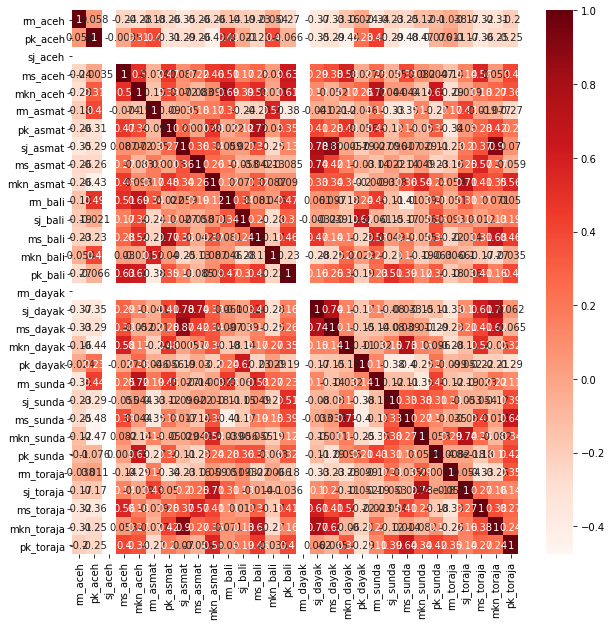

In [29]:
#ini buat nampilih heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(res_join_all, annot=True, cmap=plt.cm.Reds)

In [30]:
# #corr with output variabel
# cor_target = res_join_all['rm_aceh']

# #selecting
# relevant_features = cor_target[cor_target>-1]
# relevant_features

In [31]:
fill_nan = res_join_all.replace(np.nan, -1)

In [32]:
# #corr with output variabel
cor_target = fill_nan[['rm_aceh','rm_asmat','rm_bali','rm_dayak','rm_sunda','rm_toraja',
                       'sj_aceh','sj_asmat','sj_bali','sj_dayak','sj_sunda','sj_toraja',
                       'ms_aceh','ms_asmat','ms_bali','ms_dayak','ms_sunda','ms_toraja',
                       'mkn_aceh','mkn_asmat','mkn_bali','mkn_dayak','mkn_sunda','mkn_toraja',
                       'pk_aceh','pk_asmat','pk_bali','pk_dayak','pk_sunda','pk_toraja'
                       ]]

# #selecting
relevant_features = cor_target[cor_target>0.0000]

In [33]:
# x = [(res_aceh.rm_aceh, res_asmat.rm_asmat),(res_bali.rm_bali, res_sunda.rm_sunda),(res_dayak.rm_dayak, res_toraja.rm_toraja)]

# for a,b in x:
#   print(a,b, 'Nilai',a.corr(b,method='pearson'))

In [34]:
# x = [(res_aceh.rm_aceh, res_asmat.rm_asmat,res_bali.rm_bali, res_sunda.rm_sunda,res_dayak.rm_dayak, res_toraja.rm_toraja)]

# for a,b,c,d,e,f in x:
#   print(a,b, 'Nilai',a.corr(b,method='pearson'))

In [76]:
te = [hasil_rumah, hasil_senjata,hasil_makanan,hasil_musik, hasil_pakaian]
te

[    Konten satu     Konten dua  Nilai korelasi
 10   rumah bali    rumah sunda        0.450427
 6   rumah asmat     rumah bali        0.339781
 7   rumah asmat    rumah sunda        0.187940
 8   rumah asmat   rumah toraja        0.172513
 4    rumah aceh   rumah toraja       -0.038382
 11   rumah bali   rumah toraja       -0.050512
 14  rumah sunda   rumah toraja       -0.122869
 2    rumah aceh     rumah bali       -0.142829
 0    rumah aceh    rumah asmat       -0.176552
 3    rumah aceh    rumah sunda       -0.340730
 1    rumah aceh    rumah dayak       -1.000000
 5   rumah asmat    rumah dayak       -1.000000
 9    rumah bali    rumah dayak       -1.000000
 12  rumah dayak    rumah sunda       -1.000000
 13  rumah dayak   rumah toraja       -1.000000,
       Konten satu      Konten dua  Nilai korelasi
 5   senjata asmat   senjata dayak        0.784059
 8   senjata asmat  senjata toraja        0.196008
 11   senjata bali  senjata toraja        0.130616
 13  senjata dayak    senja